## Machine Learning

### Model
a specification of a mathematical (or probabilistic) relationship that exists between different variables.

### machine learning
- creating and using models that are learned from data.
- also called predictice modeling or data minig
- Examples:
    - Predicting whether an email message is spam or not
    - Predicting whether a credit card transaction is fraudulent
    - Predicting which advertisement a shopper is most likely to click on
    - Predicting which football team is going to win the Super Bowl

#### supervised models

#### unsupervised models

#### Semisupervised Learning

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_target_df = pd.DataFrame(iris.target)
iris_target_df.head(2)

,0
0,0
1,0


In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(data, target, target_names, learning_rate = 100, perplexity = 30):
    model = TSNE(learning_rate = learning_rate, perplexity = perplexity)
    embedded = model.fit_transform(data)
    
    xs = embedded[:,0]
    ys = embedded[:,1]
    for t in np.unique(target):
        i = np.where(target == t)
        plt.scatter(xs[i], ys[i], label = target_names[t])
    
    plt.legend(loc=1)
    
    plt.show()

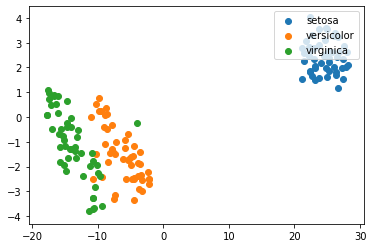

In [16]:
plot_tsne(iris.data, iris.target, iris.target_names)

### Take a look at YELP dataset
- If you use iris.data for training, it is unsupervised learning
- If you use iris.data and iris.target, it is supervised learning
- Preparing dataset for supervised learning is very expensive.

- Think about YELP dataset, too.

Manifold Learining or PCA is a type of unsupervised learning

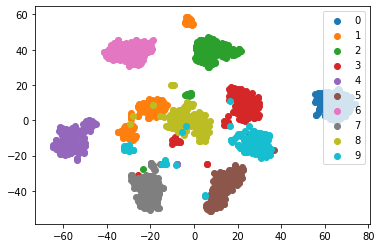

In [17]:
from sklearn import datasets

digits = datasets.load_digits()
plot_tsne(digits.data, digits.target, digits.target_names)

### What we usually do

#### Overfitting

#### Underfitting

#### Underfitting
 - The horizontal line shows the best fit degree 0 (i.e., constant) polnomial. It severely underfits the training data.
 
#### Overfitting
 - THe best fit degree 9 (i.e., 10-parameter) polynomial goes through every training data point exactly, but it very severely overfits - if we were to pick a few more data points it would quite likely miss them by a lot.
 
#### Best fitting
 - And the degree 1 line strikes a nice balance - it's pretty close to every point, and (if these data are representative) the line will likely be close to new data points as well.

#### Model complexity
 - Clearly models that are too complex lead to overfitting
 - and don't generalize well beyond the data they were trained on.

## Occam's razor
 - Exactly what Occam said: "More things should not be used than are necessary".
 - "simpler solutions are more likely to be correct than complex ones."

### To avoid overfitting
 - Use different data to train the model and to test the model.
   - Training dataset
   - Test dataset
 - When you should choose from among many models:
   - Training dataset
   - Validation set for choosing among trained models
   - Test dataset

In [18]:
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
        
def train_test_split(x, y, test_pct):
    data = list(zip(x, y))
    train, test = split_data(data, 1 - test_pct)
    x_train, y_train = list(zip(*train))
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test

### Use sklearn's train_test_split

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(12).reshape((6, 2)), list(range(6))
print(X)
print(y)
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
print(X_train, y_train)
print(X_test, y_test)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[0, 1, 2, 3, 4, 5]

[[ 2  3]
 [ 0  1]
 [10 11]
 [ 4  5]] [1, 0, 5, 2]
[[8 9]
 [6 7]] [4, 3]


### A Story

#### Suppose a model to make a binary judgement.

Spam filtering Example

#### Confusion matrix:


### Correctness

#### accuracy
 - the fraction of correct predictions:

In [27]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

In [28]:
print("accuracy(70, 4930, 13930, 981070) = {}".format(accuracy(70, 4930, 13930, 981070)))


accuracy(70, 4930, 13930, 981070) = 0.98114


#### precision, recall, f1_score
 - Precision measures how accurate our positive predictions were
 - Recall measures what fraction of the positives our model identified
 - F1 score: precision and recall are combined
     - This is the harmonic mean of precision and recall and necessarily lies between them

In [30]:
def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)


In [31]:
print("precision(70, 4930, 13930, 981070) = {}".format(precision(70, 4930, 13930, 981070)))
print("recall(70, 4930, 13930, 981070) = {}".format(recall(70, 4930, 13930, 981070)))
print("f1_score(70, 4930, 13930, 981070) = {}".format(f1_score(70, 4930, 13930, 981070)))


precision(70, 4930, 13930, 981070) = 0.014
recall(70, 4930, 13930, 981070) = 0.005
f1_score(70, 4930, 13930, 981070) = 0.00736842105263158


#### Use sklearn confusion matrix and classification_report:
 - Note that sklearn confusion is "Actual vs predicted"(sklearn)
 - Predicted vs actual (our textbook)
 - If you want to read in our textbook format, transpose the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = ["cat", "ant", "cat", "cat", "ant", "cat"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
print(confusion_matrix(y_true, y_pred, labels = ["ant", "cat"]).T)

[[2 1]
 [0 3]]


In [36]:
print(classification_report(y_true, y_pred, labels = ["ant", "cat"]))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
         cat       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [39]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = ["cat", "ant", "cat", "cat", "ant", "cat", "bird", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat", "bird", "bird"]

print(confusion_matrix(y_true, y_pred, labels = ["ant", "cat", "bird"]).T)
print(classification_report(y_true, y_pred, labels = ["ant", "cat", "bird"]))

[[2 1 0]
 [0 3 0]
 [0 0 2]]
              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
         cat       1.00      0.75      0.86         4
        bird       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.89      0.92      0.89         8
weighted avg       0.92      0.88      0.88         8

